# Actions ~ BayesRL(X)

Illustrate how the model drives behaviour.


------

```
author:     Zach Wolpe
email:      zach.wolpe@medibio.com.au
date:       23 March 2022
```

-----


In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from tqdm import tqdm
import pandas as pd
import numpy as np
import arviz as az
import pickle 
import math
# Load models
loc = './final objects'

In [2]:
loc = './final objects'
# loc_data = '/Users/zachwolpe/Documents/Production/Dynocog/Python Implementation/final instance/data objects/final data objects'
data_loc    = '/Users/zachwolpe/Documents/Production/Dynocog/Python Implementation/final instance/data objects/final data objects'
model_loc   = '/Users/zachwolpe/Documents/Production/Dynocog/Python Implementation/final instance/data objects/final model objects'
loc         = './final objects'

# load data

In [3]:

# bio models -----*
bio_model_top = np.load(model_loc + '/null_model_top.npz', allow_pickle=True)
bio_model_ran = np.load(model_loc + '/null_model_ran.npz', allow_pickle=True)

# wcst data -----*
wcst_top100     = pd.read_csv(data_loc + '/df_wcst_top_100.csv')
wcst_ran100     = pd.read_csv(data_loc + '/df_wcst_ran_100.csv')

# psychological covariates -----*
psy_top100     = pd.read_csv(data_loc + '/psy_covars_top100.csv')
psy_ran100     = pd.read_csv(data_loc + '/psy_covars_ran100.csv')

# demographic covariates -----*
dem_top100     = pd.read_csv(data_loc + '/dem_covars_top100.csv')
dem_ran100     = pd.read_csv(data_loc + '/dem_covars_ran100.csv')
# Bayesian Posterior Analysis
# extract data ----------------------------------------*
alpha   = pd.DataFrame.from_records(bio_model_top['arr_0'].tolist()['a'])
beta    = pd.DataFrame.from_records(bio_model_top['arr_0'].tolist()['b'])

a_mu  = bio_model_top['arr_0'].tolist()['a_mu']
b_mu  = bio_model_top['arr_0'].tolist()['b_mu']
a_sd  = bio_model_top['arr_0'].tolist()['a_sd_raw']
b_sd  = bio_model_top['arr_0'].tolist()['b_sd_raw']



def generate_data(bio_mod):
    alpha   = pd.DataFrame.from_records(bio_mod['arr_0'].tolist()['a'])
    beta    = pd.DataFrame.from_records(bio_mod['arr_0'].tolist()['b'])

    a_mu  = bio_mod['arr_0'].tolist()['a_mu']
    b_mu  = bio_mod['arr_0'].tolist()['b_mu']
    a_sd  = bio_mod['arr_0'].tolist()['a_sd_raw']
    b_sd  = bio_mod['arr_0'].tolist()['b_sd_raw']

    return {'alpha': alpha, 'beta': beta, 'a_mu': a_mu, 'b_mu': b_mu, 'a_sd': a_sd, 'b_sd': b_sd}


data = {}
data['top'] = generate_data(bio_model_top)
data['ran'] = generate_data(bio_model_ran)


In [4]:
# extract data ----------------------------------------*
alpha   = pd.DataFrame.from_records(bio_model_top['arr_0'].tolist()['a'])
beta    = pd.DataFrame.from_records(bio_model_top['arr_0'].tolist()['b'])

# first subject params 
a1 = alpha.loc[:,0].mean()
b1 = beta.loc[:,0].mean()

print('alpha: ', a1)
print('beta:  ', b1)

alpha:  0.9688441185927827
beta:   6.1801318205667135


In [15]:
wcst_top100
wcst_ran100.rule.count()

wcst_top100.groupby('rule').count()
wcst_top100.action.value_counts()
wcst_ran100.action.value_counts()

1.0    4252
3.0    3479
2.0    2064
Name: action, dtype: int64

In [66]:
# account for no rule ------------------------------------*
wcst.loc[wcst.action.isna(), 'action'] = 4.0

In [80]:
x.action.values[i].astype(int)

1

In [86]:

def generate_Qs_pi(x,a,b):

    # init: [shape, colour, number]
    Qs = np.ones((100,4)) * 0.333

    for i in range(1,100):
        # take action
        at = x.action.values[i].astype(int)
        rt = x.reward.values[i].astype(int)

        # update
        Qs[i, at-1] = Qs[i-1, at-1] + a * (rt - Qs[i-1, at-1])

    # generated predicted actions

    pi = np.ones((100,4)) * 0.333
    pred = []

    for i in range(100):
        
        for j in [0,1,2,3]:
            pi[i, j] = np.exp(b * Qs[i,j]) / np.exp(b * Qs[i,]).sum()

        # predict
        pred.append(np.random.choice([1,2,3,4], size=1, p=pi[i,])[0])

    return {'Qs': Qs , 'pi':pi, 'pred':pred}





def plot_data(actions, rewards, Qs):
    plt.figure(figsize=(30,3))
    x = np.arange(len(actions))

    plt.plot(x, Qs[:, 0] - .5 + 0, c='C0', lw=3, alpha=.3)
    plt.plot(x, Qs[:, 1] - .5 + 1, c='C1', lw=3, alpha=.3)
    plt.plot(x, Qs[:, 2] - .5 + 2, c='C2', lw=3, alpha=.3)

    s   = 50
    lw  = 2

    # action = 0
    print(actions)
    cond = (actions == 0) & (rewards == 0)
    plt.scatter(x[cond], actions[cond], s=s, c='None', ec='C0', lw=lw)

    cond = (actions == 0) & (rewards == 1)
    plt.scatter(x[cond], actions[cond], s=s, c='C0', ec='C0', lw=lw)

    # action = 1
    cond = (actions == 1) & (rewards == 0)
    plt.scatter(x[cond], actions[cond], s=s, c='None', ec='C1', lw=lw)

    cond = (actions == 1) & (rewards == 1)
    plt.scatter(x[cond], actions[cond], s=s, c='C1', ec='C1', lw=lw)

    # action = 2
    cond = (actions == 2) & (rewards == 0)
    plt.scatter(x[cond], actions[cond], s=s, c='None', ec='C2', lw=lw)

    cond = (actions == 2) & (rewards == 1)
    plt.scatter(x[cond], actions[cond], s=s, c='C2', ec='C2', lw=lw)


    # provide legend 
    plt.scatter(0, 40, c='k', s=s, lw=lw, label='Reward')
    plt.scatter(0, 20, c='w', ec='k', s=s, lw=lw, label='No reward')
    plt.plot([0,1], [20,20], c='k', lw=3, alpha=.3, label='Qvalue (centered)')


    # axes
    plt.yticks([0,1,2], ['colour', 'shape', 'number'])
    plt.ylim(-1, 3)
    plt.ylabel('action: matching rule')
    plt.xlabel('trial')

    # legend
    handles, labels = plt.gca().get_legend_handles_labels()
    order   = (1,2,0)
    handles = [handles[idx] for idx in order]
    labels  = [labels[idx]  for idx in order]

    plt.legend(handles, labels, fontsize=20, loc=(1.01, .27))
    plt.tight_layout()
    return plt



In [87]:
def fit_estimate(wcst, p, plot=False):
    x       = wcst.loc[wcst.participant==p,]
    p_no    = (x.index // 100)[0]

    # recover parameters estimate
    a = alpha.loc[:,p_no].mean()
    b = beta.loc[:,p_no].mean()

    # calculate
    res = generate_Qs_pi(x,a,b)
    pt  = None
    if plot:
        pt  = plot_data(x.action-1, x.reward, res['Qs'])
        # pt  = plot_data(x.action, x.reward, res['Qs'])

    # accuracy
    acc = np.mean(x.action == res['pred'])

    return {'res':res, 'pt':pt, 'acc':acc}

In [103]:
# Select participant
# wcst = wcst_ran100.copy() # top or ran

# fetch data ---------------------------------------------------*
wcst = wcst_top100.copy()                           # top sample 
wcst.loc[wcst.action.isna(), 'action'] = 4.0        # wcs

p = 388850.0
# p = wcst.participant.sample().values[0]

In [104]:
wcst.action.unique(), wcst.reward.unique()

(array([3., 1., 2., 4.]), array([0, 1]))

In [108]:
estimate = fit_estimate(wcst, p)
estimate['acc']

0.62

In [109]:

wcst = wcst_top100.copy()

pred_acc_top = []
for p in wcst.participant.unique():
    estimate = fit_estimate(wcst, p)
    pred_acc_top.append(estimate['acc'])


wcst = wcst_ran100.copy()

pred_acc_ran    = []
reward_mean     = []
for p in wcst.participant.unique():
    estimate = fit_estimate(wcst, p)
    pred_acc_ran.append(estimate['acc'])

    # test: vs
    x = wcst.loc[wcst.participant==p,]
    reward_mean.append(x.reward.mean())

In [110]:



c1 = '#f7cac9'
c2 = '#f7cac9'
c3 = '#dec2cb'
c4 = '#c5b9cd'
c5 = '#abb1cf'
c6 = '#92a8d1'
import seaborn as sns
cls = sns.color_palette("flare", n_colors=3).as_hex()

c = 'steelblue'

fig = go.Figure()
fig.add_trace(go.Box(y=pred_acc_ran, name='random set',
                    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
                ))
fig.add_trace(go.Box(y=pred_acc_top, name = 'top set',
                marker_color = cls[2]
                ))


fig.update_layout(height=400, width=550, template='none')
fig.show()

In [111]:
# view best
print('top mean:    ', np.mean(pred_acc_top))
print('top median:  ', np.median(pred_acc_top))
print('---'*10)
print('ran mean:    ', np.mean(pred_acc_ran))
print('ran median:  ', np.median(pred_acc_ran))
print('ran max:     ', np.max(pred_acc_ran))
print('ran min:     ', np.min(pred_acc_ran))

top mean:     0.7798999999999999
top median:   0.785
------------------------------
ran mean:     0.7041000000000001
ran median:   0.73
ran max:      0.87
ran min:      0.38


In [112]:

# np.mean(r.action==0), np.mean(r.action==1), np.mean(r.action==2), np.mean(r.action==3)

x.reward.value_counts()

1    64
0    36
Name: reward, dtype: int64

participant:  524310.0
Ave score:    0.83


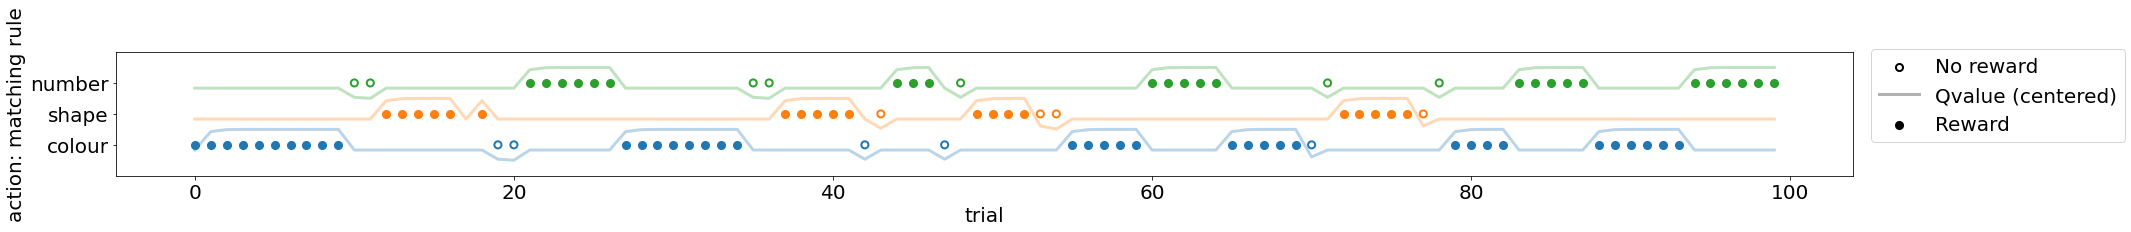

In [113]:
# find max
max_idx = np.where(pred_acc_ran==np.max(pred_acc_ran))[0][0]
p = wcst.participant.unique()[max_idx]
p = np.random.choice(wcst.participant.unique())
print('participant: ', p)
print('Ave score:   ', wcst.loc[wcst.participant==p, ].reward.mean()) # 317920.0

# p = np.random.choice(wcst.participant.unique())
plt.rcParams.update({'font.size': 20})
r = fit_estimate(wcst, p, plot=True)

In [96]:
px.scatter(reward_mean, pred_acc_ran)

0.89

In [99]:
def plot_data(actions, rewards, Qs):
    plt.figure(figsize=(30,3))
    x = np.arange(len(actions))

    plt.plot(x, Qs[:, 0] - .5 + 0, c='C0', lw=3, alpha=.3)
    plt.plot(x, Qs[:, 1] - .5 + 1, c='C1', lw=3, alpha=.3)
    plt.plot(x, Qs[:, 2] - .5 + 2, c='C2', lw=3, alpha=.3)

    s   = 50
    lw  = 2

    # action = 0
    cond = (actions == 0) & (rewards == 0)
    plt.scatter(x[cond], actions[cond], s=s, c='None', ec='C0', lw=lw)

    cond = (actions == 0) & (rewards == 1)
    plt.scatter(x[cond], actions[cond], s=s, c='C0', ec='C0', lw=lw)

    # action = 1
    cond = (actions == 1) & (rewards == 0)
    plt.scatter(x[cond], actions[cond], s=s, c='None', ec='C1', lw=lw)

    cond = (actions == 1) & (rewards == 1)
    plt.scatter(x[cond], actions[cond], s=s, c='C1', ec='C1', lw=lw)

    # action = 2
    cond = (actions == 2) & (rewards == 0)
    plt.scatter(x[cond], actions[cond], s=s, c='None', ec='C2', lw=lw)

    cond = (actions == 2) & (rewards == 1)
    plt.scatter(x[cond], actions[cond], s=s, c='C2', ec='C2', lw=lw)


    # provide legend 
    plt.scatter(0, 40, c='k', s=s, lw=lw, label='Reward')
    plt.scatter(0, 20, c='w', ec='k', s=s, lw=lw, label='No reward')
    plt.plot([0,1], [20,20], c='k', lw=3, alpha=.3, label='Qvalue (centered)')


    # axes
    plt.yticks([0,1,2], ['colour', 'shape', 'number'])
    plt.ylim(-1, 3)
    plt.ylabel('action: matching rule')
    plt.xlabel('trial')

    # legend
    handles, labels = plt.gca().get_legend_handles_labels()
    order   = (1,2,0)
    handles = [handles[idx] for idx in order]
    labels  = [labels[idx]  for idx in order]

    plt.legend(handles, labels, fontsize=20, loc=(1.01, .27))
    plt.tight_layout()

In [100]:
x

,Unnamed: 0,participant,reward,status,action,rule,rule_correct,rule_used,n_t
9900,27100,541645.0,1,1,1.0,shape,shape,shape,0
9901,27101,541645.0,1,1,1.0,shape,shape,shape,1
9902,27102,541645.0,1,1,1.0,shape,shape,shape,2
9903,27103,541645.0,1,1,1.0,shape,shape,shape,3
9904,27104,541645.0,1,1,1.0,shape,shape,shape,4
...,...,...,...,...,...,...,...,...,...
9995,27195,541645.0,1,1,3.0,color,color,color,95
9996,27196,541645.0,1,1,3.0,color,color,color,96
9997,27197,541645.0,1,1,3.0,color,color,color,97
9998,27198,541645.0,1,1,3.0,color,color,color,98


In [101]:
def data_generating_process(alpha, beta, n=100, p_r=[.8, .6, .7]):
  actions = np.zeros(n, dtype=np.int)
  rewards = np.zeros(n, dtype=np.int)
  Qs      = np.zeros((n, 3))

  # Q init
  Q = np.array(len(p_r)*[1/len(p_r)])

  for i in tqdm(range(n)):
    # P(a|Q): Apply Boltzmann distribution
    exp_Q = np.exp(beta*Q)
    pi_a  = exp_Q / np.sum(exp_Q)


    # Simulate action-reward
    a = np.random.choice([0,1,2], p=pi_a)
    r = np.random.rand() < p_r[a]

    # Update Qt(a) = Qt-1(a) + a[RPE]
    Q[a] = Q[a] + alpha * (r - Q[a])

    # store
    actions[i] = a
    rewards[i] = r
    Qs[i] = Q.copy()

  return actions, rewards, Qs  

In [102]:

x

,Unnamed: 0,participant,reward,status,action,rule,rule_correct,rule_used,n_t
9900,27100,541645.0,1,1,1.0,shape,shape,shape,0
9901,27101,541645.0,1,1,1.0,shape,shape,shape,1
9902,27102,541645.0,1,1,1.0,shape,shape,shape,2
9903,27103,541645.0,1,1,1.0,shape,shape,shape,3
9904,27104,541645.0,1,1,1.0,shape,shape,shape,4
...,...,...,...,...,...,...,...,...,...
9995,27195,541645.0,1,1,3.0,color,color,color,95
9996,27196,541645.0,1,1,3.0,color,color,color,96
9997,27197,541645.0,1,1,3.0,color,color,color,97
9998,27198,541645.0,1,1,3.0,color,color,color,98
